<a href="https://colab.research.google.com/github/IreneWanjiruKariuki/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import required libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving Stars.csv to Stars (1).csv


**Q2-Clean data and carry out Exploratory Data Analysis**

1. Data Understanding

In [53]:
# Display first few rows
df.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [54]:
# Display last few rows
df.tail()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Hypergiant,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Hypergiant,Blue,O
237,8829,537493.0,1423.0,-10.73,5,Hypergiant,White,A
238,9235,404940.0,1112.0,-11.23,5,Hypergiant,White,A
239,37882,294903.0,1783.0,-7.80,5,Hypergiant,Blue,O


In [55]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [56]:
# Summary statistics
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [57]:
#Describe the columns in the dataset.
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [58]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [59]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [60]:
#df['Star color'].unique()

In [61]:
df['Star category'].unique()

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
       'Supergiant', 'Hypergiant'], dtype=object)

In [62]:
df.groupby('Star type')['Star category'].unique()

,Star category
Star type,
0,[Brown Dwarf]
1,[Red Dwarf]
2,[White Dwarf]
3,[Main Sequence]
4,[Supergiant]
5,[Hypergiant]


In [63]:
df.duplicated().sum()

np.int64(0)

2. Data Cleaning

In [64]:
# Standardize 'Star color' column text
df['Star color'] = (
    df['Star color']
        .str.strip()   #remove duplicates
        .str.upper()    #make them uppercase
        .str.replace('-', ' ')  #anywhere with - use a space instead
)


In [65]:
#Confirm the columns are standardized.
df['Star color'].unique()

array(['RED', 'BLUE WHITE', 'WHITE', 'YELLOWISH WHITE',
       'PALE YELLOW ORANGE', 'BLUE', 'WHITISH', 'YELLOW WHITE', 'ORANGE',
       'WHITE YELLOW', 'YELLOWISH', 'ORANGE RED'], dtype=object)

**Exploratory Data Analysis**

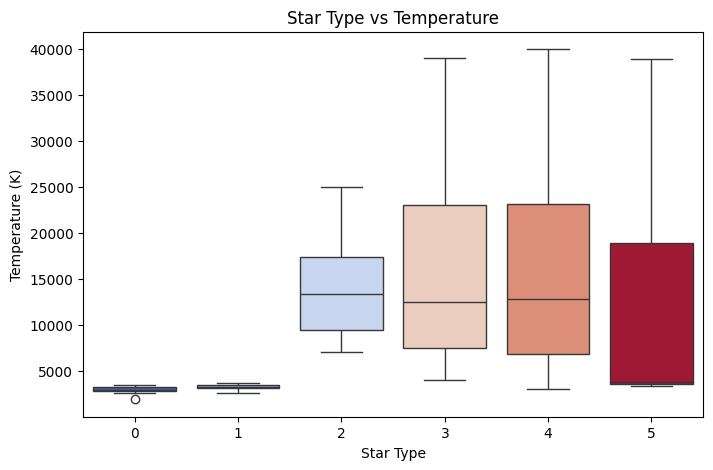

In [66]:
# 1: Temperature Distribution by Star Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Star type', y='Temperature (K)', data=df, palette='coolwarm', hue='Star type', legend=False)
plt.title('Star Type vs Temperature')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.show()


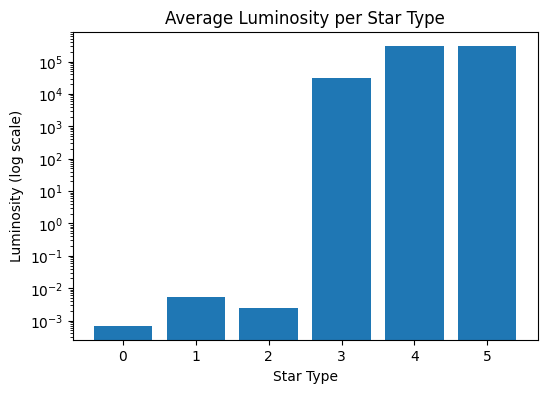

In [67]:
# 2. Luminosity vs Star Type
lum_mean = df.groupby('Star type')['Luminosity (L/Lo)'].mean()

plt.figure(figsize=(6,4))
plt.bar(lum_mean.index, lum_mean.values)
plt.yscale('log')
plt.title("Average Luminosity per Star Type")
plt.ylabel("Luminosity (log scale)")
plt.xlabel("Star Type")
plt.show()


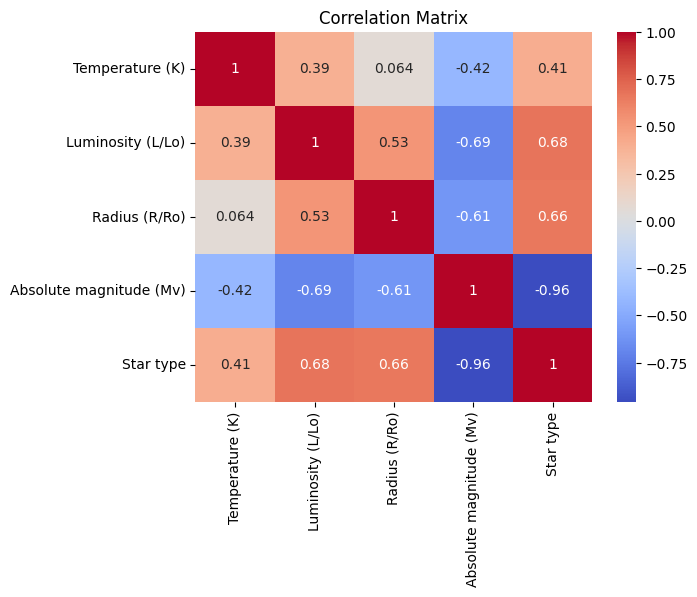

In [68]:
#3: Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


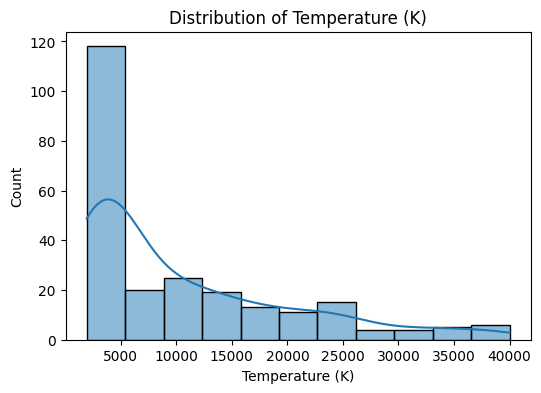

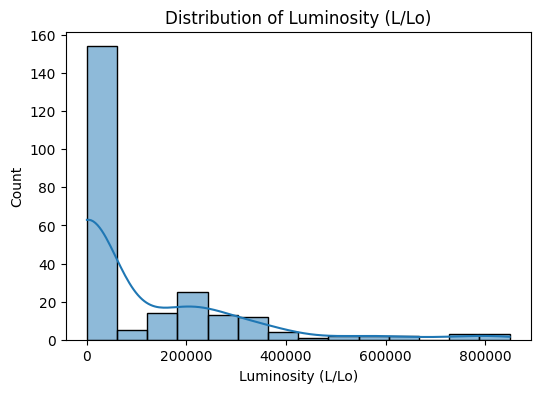

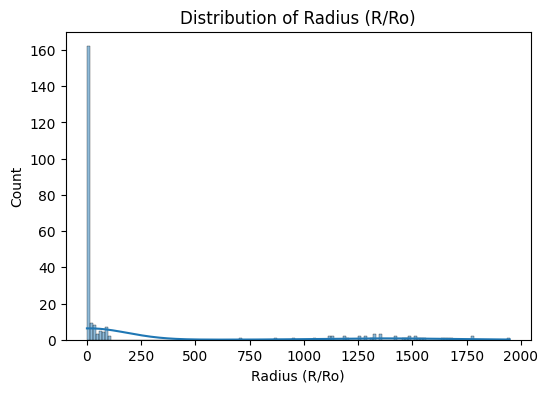

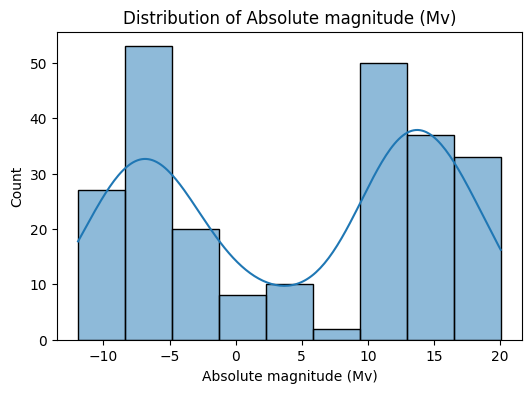

In [69]:
# 4. Histograms for numeric variables
numeric_cols = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Q3. Create a model based on the k-Nearest Neighbours algorithm for classificationbased on at least 2 suitable features for one target variable.**

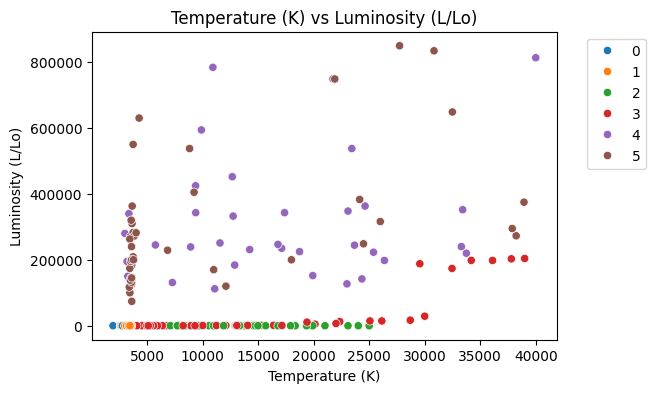

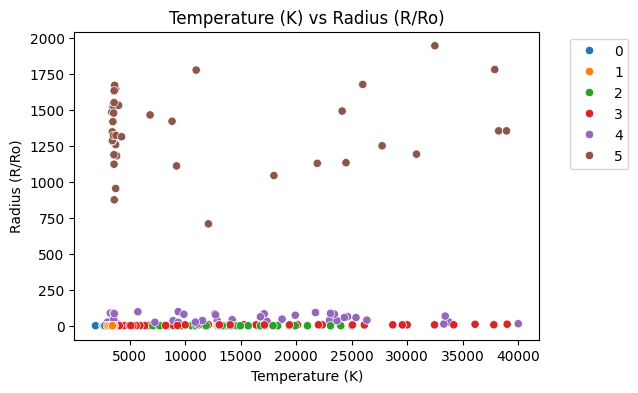

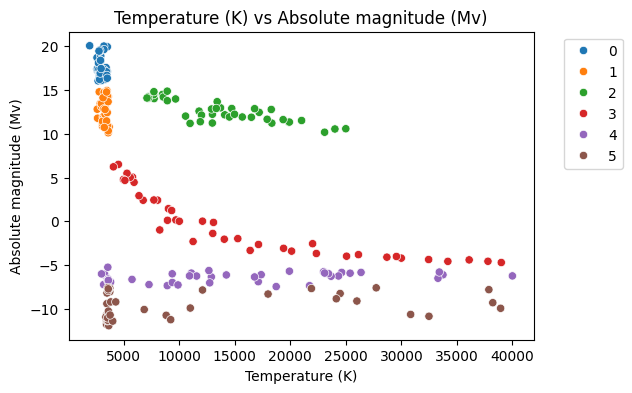

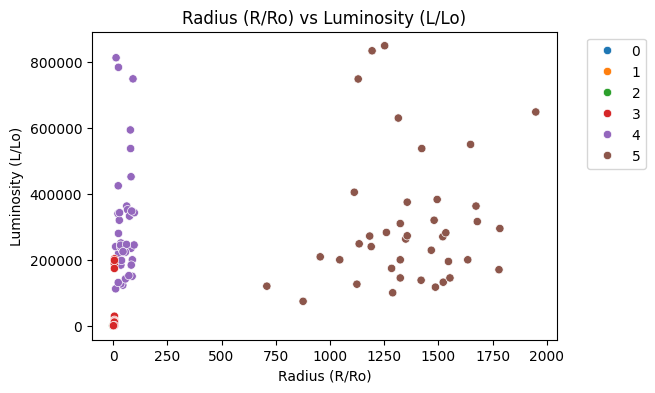

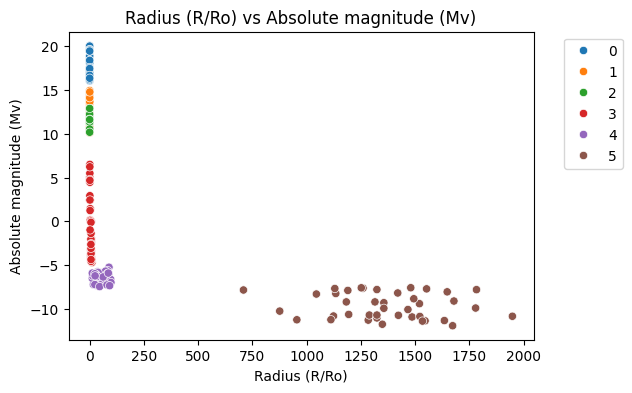

In [70]:
pairs = [
    ('Temperature (K)', 'Luminosity (L/Lo)'),
    ('Temperature (K)', 'Radius (R/Ro)'),
    ('Temperature (K)', 'Absolute magnitude (Mv)'),
    ('Radius (R/Ro)', 'Luminosity (L/Lo)'),
    ('Radius (R/Ro)', 'Absolute magnitude (Mv)')
]

for x, y in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=y, hue='Star type', data=df, palette='tab10')
    plt.title(f'{x} vs {y}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



In [71]:
X = df[['Radius (R/Ro)', 'Absolute magnitude (Mv)']]
y = df['Star type']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
# List to store cross-validation scores
cv_scores_mean = []

# Loop through possible k values
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation on training data
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores_mean.append(scores.mean())

In [74]:
# Find the optimal k
optimal_k = k_range[np.argmax(cv_scores_mean)]
print(f"Optimal k based on CV: {optimal_k}")

Optimal k based on CV: 4


In [75]:
# Train final model with optimal k
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

In [76]:
# Final test accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy on Test Set: {final_accuracy:.3f}")

Final Model Accuracy on Test Set: 0.854


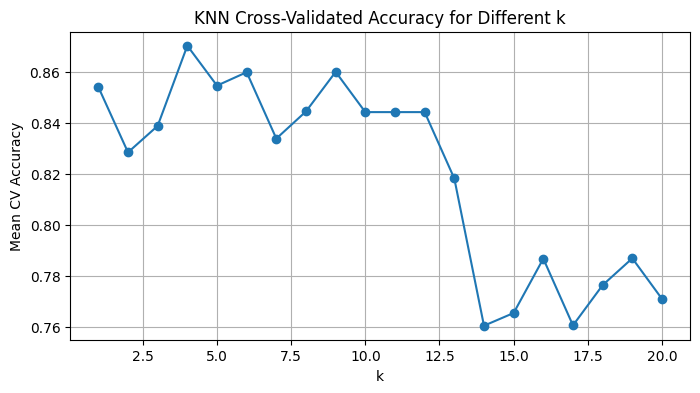

In [77]:
# Plot cross-validated accuracy vs k
plt.figure(figsize=(8,4))
plt.plot(k_range, cv_scores_mean, marker='o')
plt.title('KNN Cross-Validated Accuracy for Different k')
plt.xlabel('k')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()


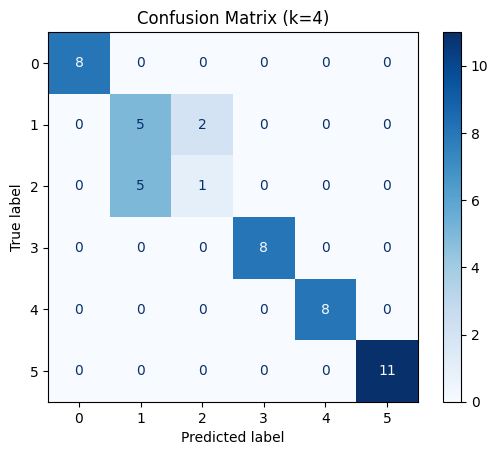

In [78]:
# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (k={optimal_k})')
plt.show()

In [79]:
knn_cv = KNeighborsClassifier(n_neighbors=optimal_k)
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.84615385 0.82051282 0.81578947 0.92105263 0.94736842]
Mean cross-validation accuracy: 0.8701754385964913


Q4. Create another eager learning classifier as assigned based on at least 2 suitable
features for one target variable.

In [80]:
#Separating features and target
X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star category']

In [81]:
# Step 2: Split into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [97]:
#Training a Decision Tree
model = DecisionTreeClassifier(random_state=0)#reduces depth for clarity
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

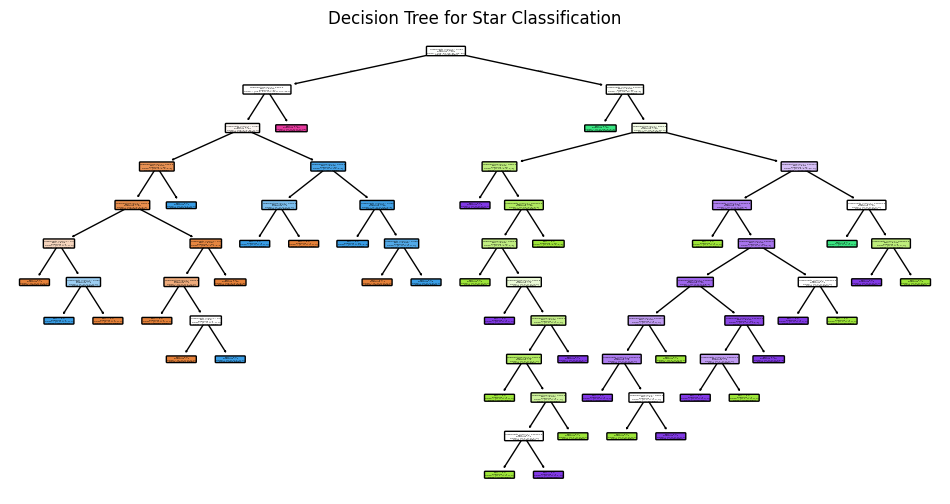

In [99]:
#Visualizing the Decision Tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['Temperature (K)', 'Luminosity (L/Lo)'],class_names=[str(cls) for cls in model.classes_],filled=True,rounded=True)
plt.title("Decision Tree for Star Classification")
plt.show()

In [100]:
# Step 6: Evaluate model on test data
y_pred = model.predict(X_test)

In [102]:
# Show the first few predictions alongside actual values
results = pd.DataFrame({
    'Actual Category': y_test.values,
    'Predicted Category': y_pred
})
print(results.head(5))

  Actual Category Predicted Category
0      Supergiant         Hypergiant
1       Red Dwarf          Red Dwarf
2   Main Sequence      Main Sequence
3       Red Dwarf          Red Dwarf
4      Supergiant         Supergiant


In [103]:
#Performing 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

#Each fold’s accuracy
print("Cross-Validation Scores:", cv_scores)

#Mean accuracy
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.66666667 0.77083333 0.8125     0.79166667 0.83333333]
Mean Cross-Validation Accuracy: 0.775


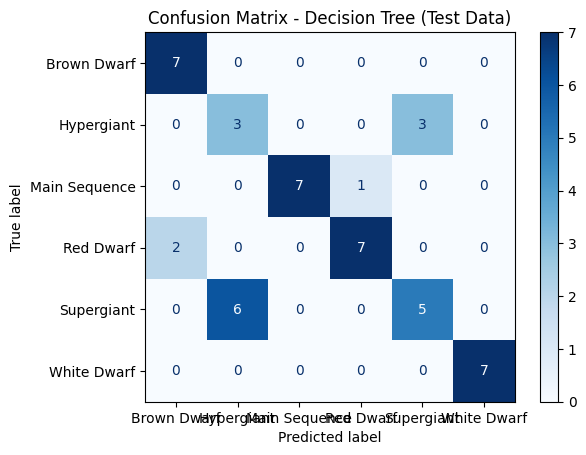

In [104]:
# Step 8: Generate and Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Test Data)")
plt.show()

Q5. For the eager learner created in Q4, create another model with tuned
hyperparameters that enhance the accuracy of classification.

In [105]:
#Prepare features and target

X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star category']

In [106]:
# Step 2: Split into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [107]:
#Base model

dt = DecisionTreeClassifier(random_state=0)

In [108]:
#Defining hyperparameter grid

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [109]:
#Performing Grid Search with Cross-Validation

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_search.best_score_, 4))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8167


In [110]:
#Create and train the tuned model

best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
#Evaluating tuned model
cv_scores = cross_val_score(best_dt, X, y, cv=5)
print(f"Mean CV Accuracy (Tuned Model): {np.mean(cv_scores):.4f}")

Mean CV Accuracy (Tuned Model): 0.8167


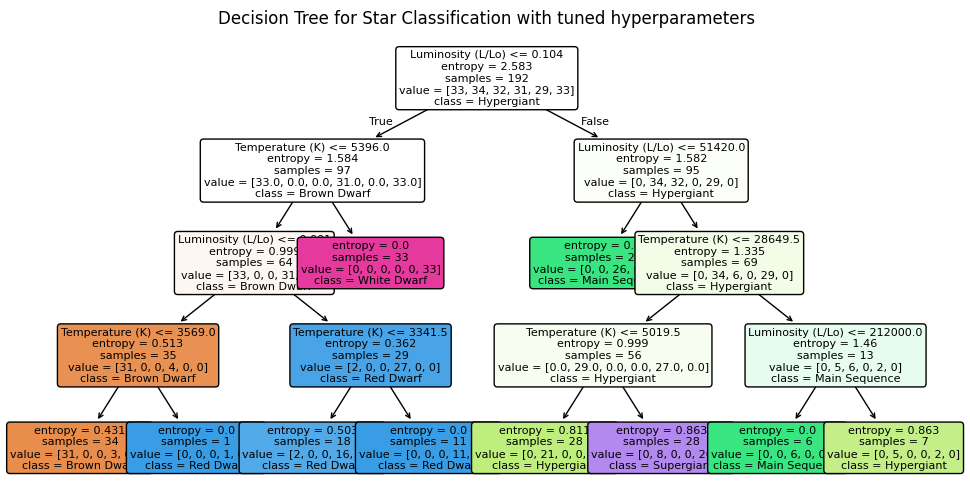

In [111]:
#Visualizing the tuned Decision Tree

plt.figure(figsize=(12,6))
plot_tree(best_dt,feature_names=['Temperature (K)', 'Luminosity (L/Lo)'],class_names=[str(cls) for cls in best_dt.classes_],filled=True,rounded=True,fontsize=8)
plt.title("Decision Tree for Star Classification with tuned hyperparameters")
plt.show()

In [113]:
# Step: Make predictions using the testing data
y_pred = best_dt.predict(X_test)

# Step: Compare Actual vs Predicted Categories
results = pd.DataFrame({
    'Actual Category': y_test.values,
    'Predicted Category': y_pred
})
print("\nSample Prediction Results (Tuned Model):")
print(results.head(5))


Sample Prediction Results (Tuned Model):
  Actual Category Predicted Category
0      Supergiant         Hypergiant
1       Red Dwarf          Red Dwarf
2   Main Sequence      Main Sequence
3       Red Dwarf          Red Dwarf
4      Supergiant         Supergiant


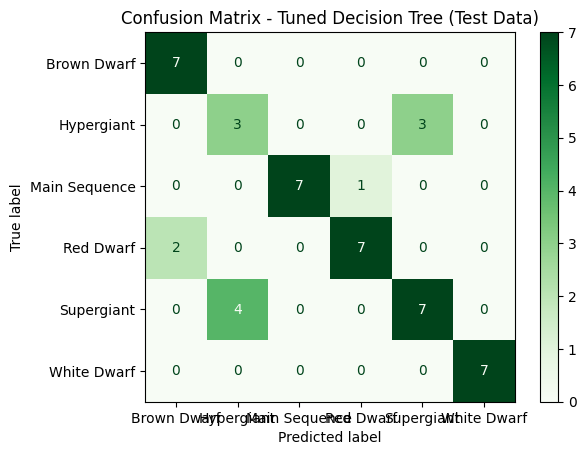

In [114]:
# Step: Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Tuned Decision Tree (Test Data)")
plt.show()